In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic =pd.read_csv('/kaggle/input/anomaly-detection-titanic-train/titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic['Age'].isnull().sum()

177

In [8]:
titanic['Age'].dtype

dtype('float64')

In [9]:
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
titanic['Age'].mean()

29.69911764705882

In [11]:
titanic['Age']= titanic['Age'].fillna(29.69911764705882)

In [12]:
titanic['Age'].isnull().sum()

0

In [13]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
titanic.drop('Cabin', inplace=True, axis=1)

In [15]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
titanic[['C','Q']]=pd.get_dummies(titanic['Embarked'],drop_first=True,dtype='int')

In [18]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
C              0
Q              0
dtype: int64

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [20]:
titanic['male']= pd.get_dummies(titanic['Sex'],dtype=int,drop_first=True)

In [21]:
titanic.drop('Sex', inplace=True, axis=1)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1,1


In [23]:
titanic.drop('Embarked',inplace=True,axis=1)

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1


In [25]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
C              0
Q              0
male           0
dtype: int64

In [26]:
titanic.drop('Name', inplace=True,axis=1)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,C,Q,male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,0,1,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,4,1,1,35.0,1,0,113803,53.1000,0,1,0
4,5,0,3,35.0,0,0,373450,8.0500,0,1,1


In [28]:
titanic.drop('Ticket', inplace=True,axis=1)

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


<Axes: xlabel='Age', ylabel='Count'>

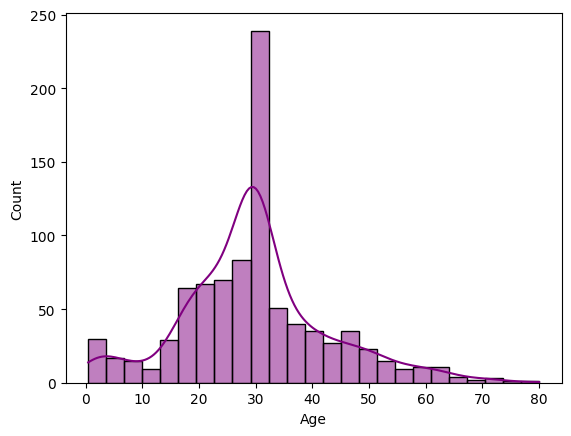

In [30]:
sns.histplot(titanic['Age'], bins=25,kde=True,color='purple')

<Axes: xlabel='Survived', ylabel='count'>

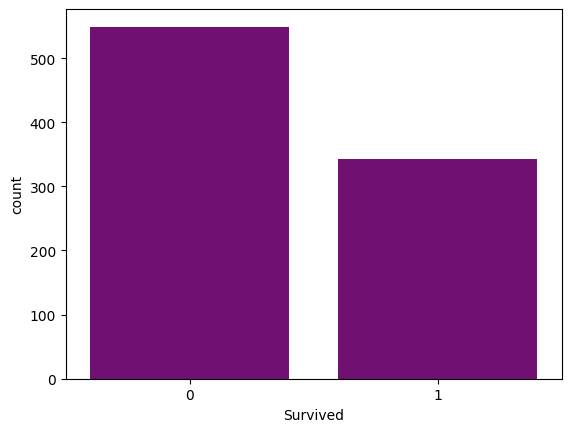

In [31]:
sns.countplot(data=titanic,x='Survived',color='Purple')

<Axes: xlabel='Pclass', ylabel='Fare'>

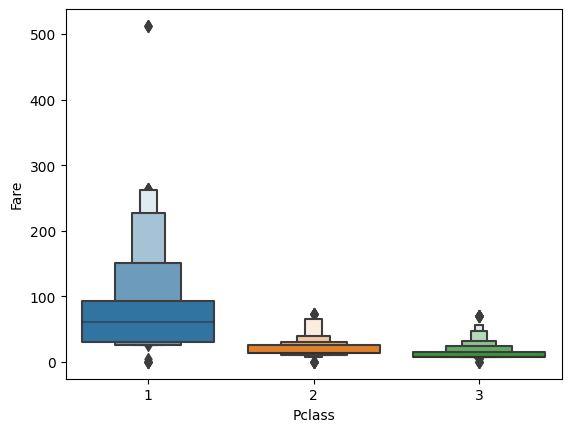

In [32]:
sns.boxenplot(x='Pclass',y='Fare',data=titanic)

<Axes: xlabel='Pclass', ylabel='Survived'>

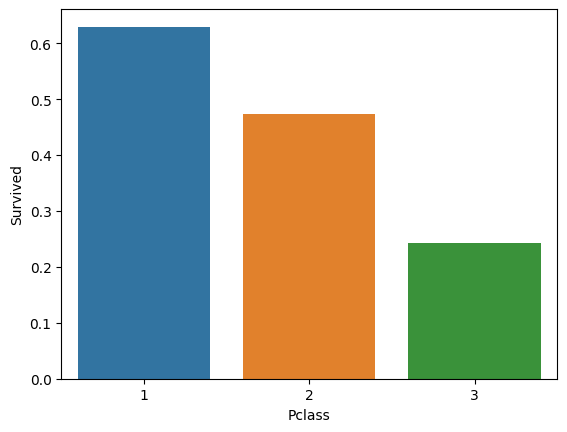

In [33]:
sns.barplot(x='Pclass',y='Survived', data=titanic, ci=None)

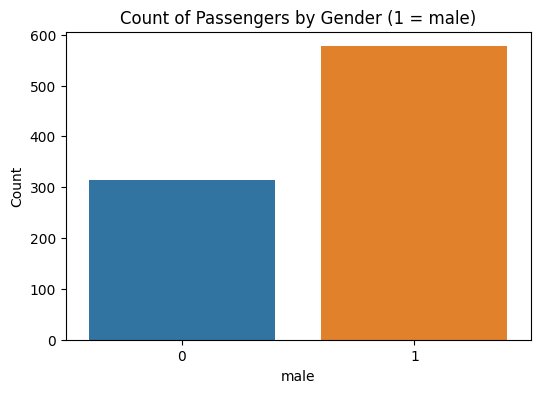

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='male', data=titanic)
plt.title('Count of Passengers by Gender (1 = male)')
plt.xlabel('male')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

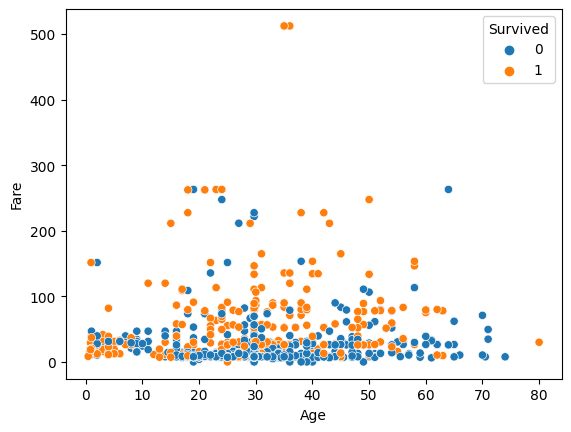

In [35]:
sns.scatterplot(x='Age',y='Fare', data=titanic, hue='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

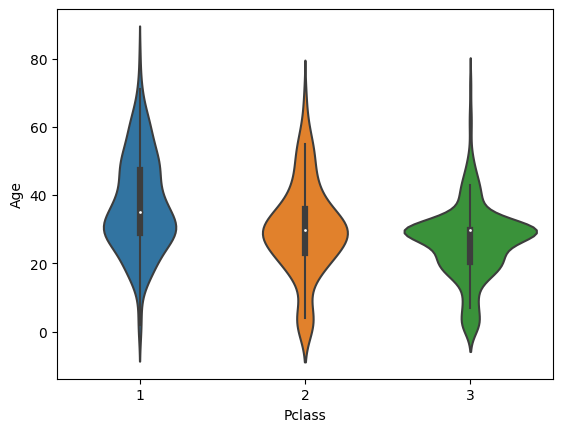

In [36]:
sns.violinplot(x='Pclass',y='Age',data=titanic)

<Axes: xlabel='Survived', ylabel='Age'>

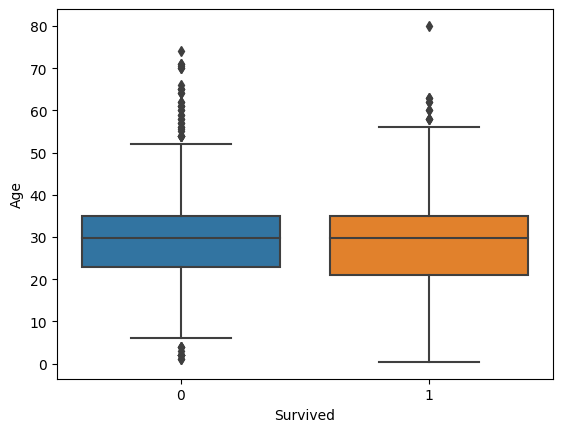

In [37]:
sns.boxplot(x='Survived',y='Age',data=titanic)

In [38]:
corr= titanic.corr()

<Axes: >

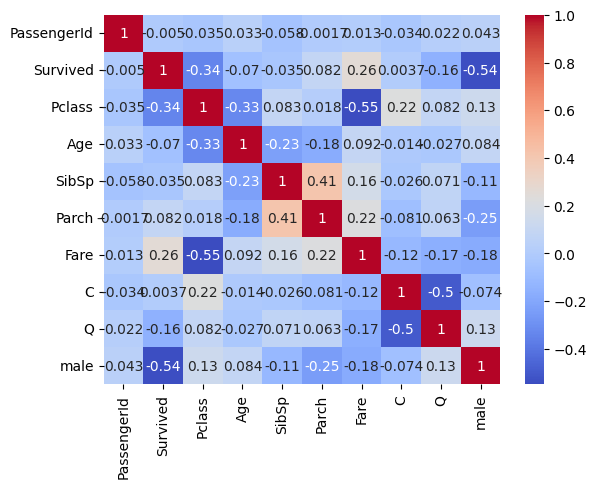

In [39]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

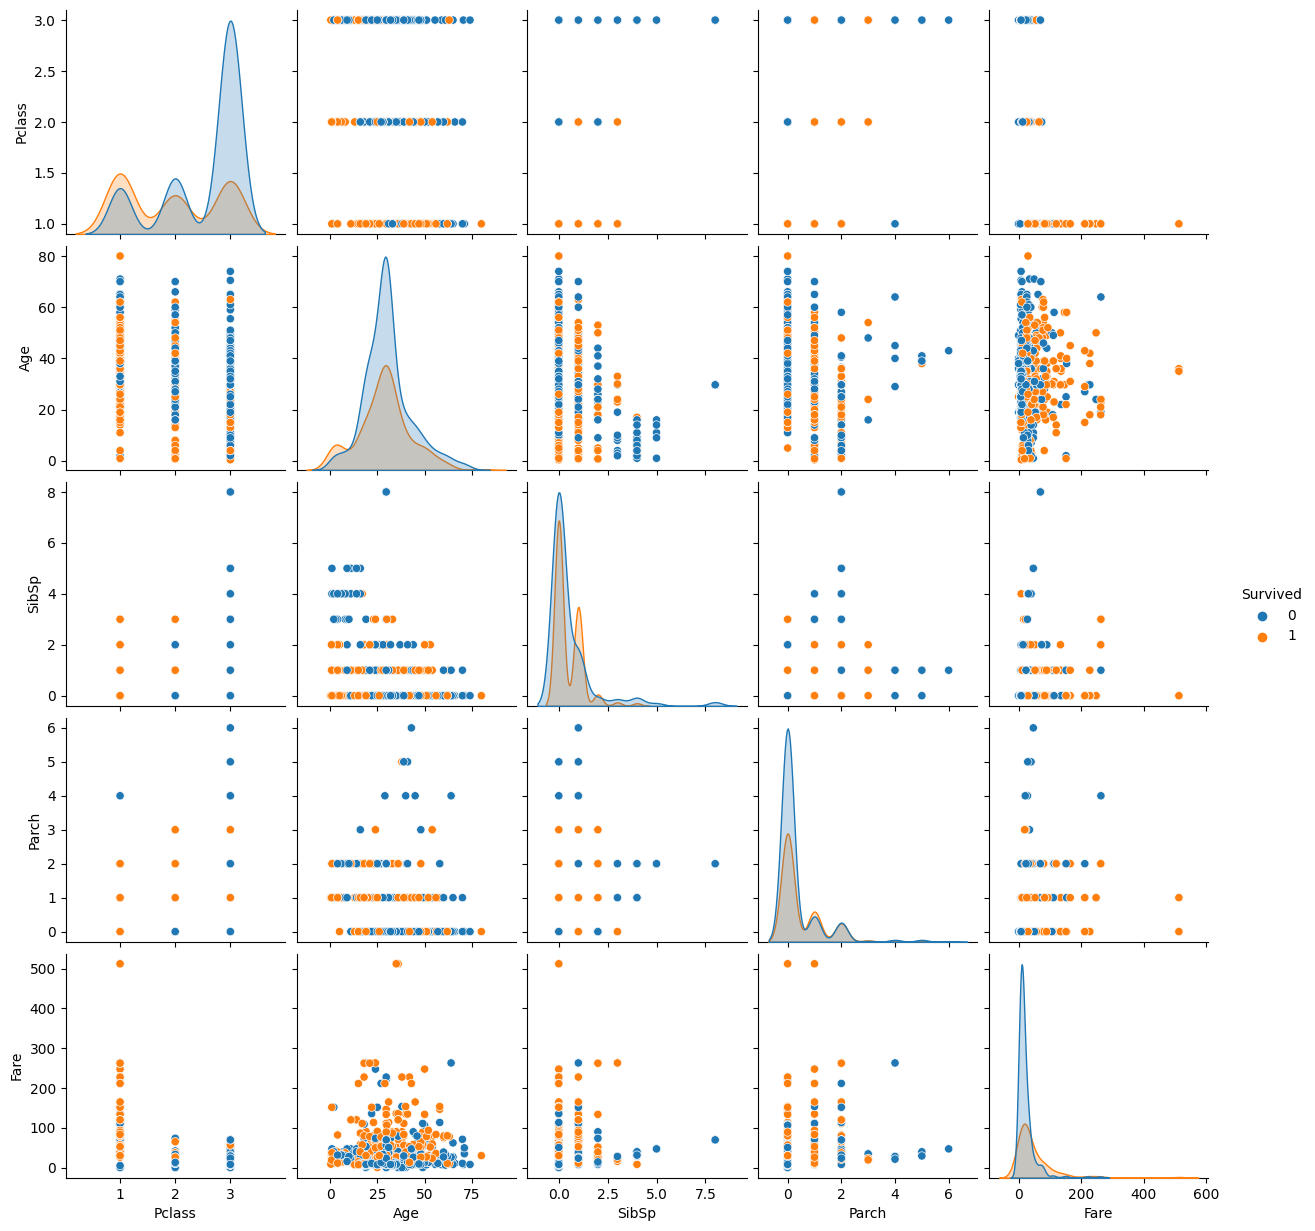

In [40]:
sns.pairplot(titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', diag_kind='kde')
plt.show()

In [48]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


In [49]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'male'],
      dtype='object')

In [50]:
X= titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','C']]

In [51]:
y= titanic['Survived']

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
SS=StandardScaler()

In [54]:
X= SS.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [57]:
X_train

array([[-1.56610693,  1.87005862, -0.4745452 , ...,  0.73769513,
         0.61930636, -0.30756234],
       [ 0.82737724,  0.        , -0.4745452 , ...,  0.73769513,
        -1.61470971,  3.25137334],
       [-0.36936484, -0.36161755,  0.43279337, ...,  0.73769513,
        -1.61470971, -0.30756234],
       ...,
       [ 0.82737724,  0.86965206,  1.34013193, ...,  0.73769513,
         0.61930636, -0.30756234],
       [-1.56610693, -1.20811541,  0.43279337, ..., -1.35557354,
         0.61930636, -0.30756234],
       [-1.56610693, -0.66943495, -0.4745452 , ...,  0.73769513,
         0.61930636, -0.30756234]])

In [58]:
X_test

array([[ 0.82737724,  0.        ,  0.43279337, ...,  0.73769513,
        -1.61470971, -0.30756234],
       [-0.36936484,  0.10010856, -0.4745452 , ...,  0.73769513,
         0.61930636, -0.30756234],
       [ 0.82737724, -0.7463893 , -0.4745452 , ...,  0.73769513,
         0.61930636, -0.30756234],
       ...,
       [ 0.82737724, -2.20852197, -0.4745452 , ..., -1.35557354,
        -1.61470971, -0.30756234],
       [ 0.82737724,  0.        , -0.4745452 , ..., -1.35557354,
        -1.61470971, -0.30756234],
       [ 0.82737724, -0.66943495, -0.4745452 , ...,  0.73769513,
         0.61930636, -0.30756234]])

In [59]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

In [60]:
import tensorflow as tf
ann = tf.keras.models.Sequential() 

2024-07-22 14:27:30.517811: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 14:27:30.517951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 14:27:30.663316: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [61]:
# input layer and hidden layer 1
ann.add(tf.keras.layers.Dense(units=40,activation='relu'))

In [62]:
#  hidden layer 2
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))

In [63]:
#  hidden layer 3
ann.add(tf.keras.layers.Dense(units=20,activation='relu'))

In [64]:
#  Output layer 
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [65]:
# Optimizing by Adam Optimizer, 'binary_crossentropy' is selected as Loss function
# accuracy is selected as metrics

'''Adam (Adaptive Moment Estimation): Combines the advantages of both Adagrad and RMSprop. It uses both the first-order (mean) and second-order (uncentered variance) moments of the gradients.'''

'Adam (Adaptive Moment Estimation): Combines the advantages of both Adagrad and RMSprop. It uses both the first-order (mean) and second-order (uncentered variance) moments of the gradients.'

In [66]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
ann.fit(X_train,y_train,batch_size= 10,epochs=150)

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6353 - loss: 0.6572
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7958 - loss: 0.4916
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.4492
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8215 - loss: 0.4455
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8134 - loss: 0.4242
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8301 - loss: 0.3965
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 0.4125
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.4048
Epoch 9/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8402 - loss: 0.3978
Epoch 10/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.4030
Epoch 11/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8354 - loss: 0.3764
Epoch 12/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [68]:
ann_loss = pd.DataFrame(ann.history.history)

<Axes: >

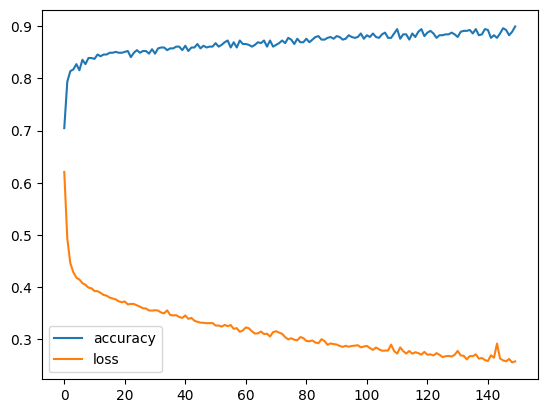

In [69]:
ann_loss.plot()

In [70]:
y_pred= (ann.predict(X_test)> 1.0).astype('int32')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
accuracy_score(y_test,y_pred)

0.5932203389830508

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       175
           1       0.00      0.00      0.00       120

    accuracy                           0.59       295
   macro avg       0.30      0.50      0.37       295
weighted avg       0.35      0.59      0.44       295



In [74]:
confusion_matrix(y_pred,y_test)

array([[175, 120],
       [  0,   0]])

In [75]:
#RMSprop

'''RMSprop: Root Mean Square Propagation, which also adapts the learning rate for each parameter based on recent gradients.'''

'RMSprop: Root Mean Square Propagation, which also adapts the learning rate for each parameter based on recent gradients.'

In [76]:
ann.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [77]:
ann.fit(X_train,y_train,batch_size= 10,epochs=150)

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8941 - loss: 0.2595 
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9078 - loss: 0.2228
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8943 - loss: 0.2520
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8778 - loss: 0.2570
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8796 - loss: 0.2854
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8949 - loss: 0.2430
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8869 - loss: 0.2748
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8873 - loss: 0.2709
Epoch 9/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.2685
Epoch 10/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8788 - loss: 0.2773
Epoch 11/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9085 - loss: 0.2318
Epoch 12/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [78]:
ann_loss = pd.DataFrame(ann.history.history)

In [79]:
y_pred= (ann.predict(X_test)> 1.0).astype('int32')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
accuracy_score(y_test,y_pred)

0.5932203389830508

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       175
           1       0.00      0.00      0.00       120

    accuracy                           0.59       295
   macro avg       0.30      0.50      0.37       295
weighted avg       0.35      0.59      0.44       295



In [83]:
confusion_matrix(y_pred,y_test)

array([[175, 120],
       [  0,   0]])